## Group 2: Mobile Banking Prdiction Challenge
#### Group Members
- Anen Isaac
-Godson Ntungi
-Habiba Machela

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/21anen/Data-Science/main/Train.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [4]:
# print shape 
print('train data shape :', data.shape)

train data shape : (108446, 42)


In [5]:
#show list of columns 
list(data.columns)  

['ID',
 'country_code',
 'region',
 'age',
 'FQ1',
 'FQ2',
 'FQ3',
 'FQ4',
 'FQ5',
 'FQ6',
 'FQ7',
 'FQ8',
 'FQ9',
 'FQ10',
 'FQ11',
 'FQ12',
 'FQ13',
 'FQ14',
 'FQ15',
 'FQ16',
 'FQ17',
 'FQ18',
 'FQ19',
 'FQ20',
 'FQ21',
 'FQ22',
 'FQ23',
 'FQ24',
 'FQ35',
 'FQ36',
 'FQ25',
 'FQ26',
 'FQ27',
 'FQ28',
 'FQ29',
 'FQ30',
 'FQ31',
 'FQ32',
 'FQ33',
 'FQ34',
 'FQ37',
 'Target']

In [6]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

**Checking for Missing Values**

In [7]:
# Check for missing values
print('missing values:', data.isnull().sum())              

missing values: ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64


**Removing columns with more than 70% missing values**

In [8]:
#drop columns that have 70% or more of data missing
data_null = data.isnull().sum() / len(data)
missing_features = data_null[data_null > 0.70].index
print('dropped features: ',missing_features)
data.drop(missing_features, axis=1, inplace=True)

dropped features:  Index(['FQ5', 'FQ17', 'FQ35', 'FQ36', 'FQ27', 'FQ28', 'FQ30', 'FQ31'], dtype='object')


In [9]:
# Check again for missing values
print('missing values:', data.isnull().sum()) 

missing values: ID                  0
country_code        0
region              0
age               322
FQ1                 0
FQ2             59322
FQ3             62228
FQ4                 0
FQ6             47787
FQ7             47826
FQ8                 0
FQ9                 0
FQ10                0
FQ11            24570
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ18                0
FQ19            47407
FQ20            24679
FQ21            24635
FQ22                0
FQ23                0
FQ24            70014
FQ25                0
FQ26                0
FQ29            24534
FQ32            47650
FQ33                2
FQ34            31794
FQ37                0
Target              0
dtype: int64


In [10]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

**Filling Missing values**

In [11]:
## Filling missing values
#for numerical data we use mean
#for categorical data we use mode(value of the highest frequency)
data['age'] = data['age'].fillna(data['age'].mean())
data['FQ2'] = data['FQ2'].fillna(data['FQ2'].mode()[0])
data['FQ3'] = data['FQ3'].fillna(data['FQ3'].mode()[0])
data['FQ6'] = data['FQ6'].fillna(data['FQ6'].mode()[0])
data['FQ7'] = data['FQ7'].fillna(data['FQ7'].mode()[0])
data['FQ11'] = data['FQ11'].fillna(data['FQ11'].mode()[0])
data['FQ19'] = data['FQ19'].fillna(data['FQ19'].mode()[0])
data['FQ20'] = data['FQ20'].fillna(data['FQ20'].mode()[0])
data['FQ21'] = data['FQ21'].fillna(data['FQ21'].mode()[0])
data['FQ24'] = data['FQ24'].fillna(data['FQ24'].mode()[0])
data['FQ29'] = data['FQ29'].fillna(data['FQ29'].mode()[0])
data['FQ32'] = data['FQ32'].fillna(data['FQ32'].mode()[0])
data['FQ33'] = data['FQ33'].fillna(data['FQ33'].mode()[0])
data['FQ34'] = data['FQ34'].fillna(data['FQ34'].mode()[0])

print('missing values:', data.isnull().sum())

missing values: ID              0
country_code    0
region          0
age             0
FQ1             0
FQ2             0
FQ3             0
FQ4             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ24            0
FQ25            0
FQ26            0
FQ29            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
Target          0
dtype: int64


In [12]:
data['FQ2'].mode()

0    1.0
dtype: float64

In [13]:
#remove ID feature 

data = data.drop('ID', axis=1)

data.shape 

(108446, 33)

In [14]:
#show first five rows
data.head()

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,...,FQ23,FQ24,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,1,6,35.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,2,2,1.0,2.0,1.0,1.0,0,0
1,32,7,70.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,1,1,2.0,2.0,1.0,2.0,0,0
2,71,7,22.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,2,1,2.0,2.0,2.0,1.0,1,0
3,48,3,27.0,1,1.0,1.0,2,2.0,1.0,2,...,2,2.0,2,2,2.0,2.0,1.0,1.0,1,0
4,25,0,79.0,2,1.0,1.0,2,1.0,1.0,2,...,1,2.0,2,2,2.0,2.0,1.0,1.0,1,0


In [15]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

**Scaling numerical Features**

In [16]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))


data['age'] = scaler.fit_transform(data['age'].values.reshape(-1,1))


In [33]:
jb.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [17]:
categorical_features = ['country_code','region','FQ1','FQ2','FQ3','FQ4','FQ6','FQ7','FQ8','FQ9','FQ10','FQ11','FQ12','FQ13','FQ14','FQ15','FQ16','FQ18','FQ19','FQ20','FQ21','FQ22','FQ23','FQ24','FQ25','FQ26','FQ29','FQ32','FQ33','FQ34','FQ37']


In [18]:
data['country_code']

0           1
1          32
2          71
3          48
4          25
         ... 
108441    111
108442     77
108443     42
108444     57
108445    110
Name: country_code, Length: 108446, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  108446 non-null  int64  
 1   region        108446 non-null  int64  
 2   age           108446 non-null  float64
 3   FQ1           108446 non-null  int64  
 4   FQ2           108446 non-null  float64
 5   FQ3           108446 non-null  float64
 6   FQ4           108446 non-null  int64  
 7   FQ6           108446 non-null  float64
 8   FQ7           108446 non-null  float64
 9   FQ8           108446 non-null  int64  
 10  FQ9           108446 non-null  int64  
 11  FQ10          108446 non-null  int64  
 12  FQ11          108446 non-null  float64
 13  FQ12          108446 non-null  int64  
 14  FQ13          108446 non-null  int64  
 15  FQ14          108446 non-null  int64  
 16  FQ15          108446 non-null  int64  
 17  FQ16          108446 non-null  int64  
 18  FQ18

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
categorical_features = ['country_code','region','FQ1','FQ2','FQ3','FQ4','FQ6','FQ7','FQ8','FQ9','FQ10','FQ11','FQ12','FQ13','FQ14','FQ15','FQ16','FQ18','FQ19','FQ20','FQ21','FQ22','FQ23','FQ24','FQ25','FQ26','FQ29','FQ32','FQ33','FQ34','FQ37']


In [22]:
oneHot=OneHotEncoder(handle_unknown='ignore')

In [23]:
data[categorical_features]

,country_code,region,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,FQ9,...,FQ22,FQ23,FQ24,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37
0,1,6,2,1.0,1.0,2,1.0,1.0,2,1,...,1,2,2.0,2,2,1.0,2.0,1.0,1.0,0
1,32,7,2,1.0,1.0,2,1.0,1.0,2,2,...,1,2,2.0,1,1,2.0,2.0,1.0,2.0,0
2,71,7,2,1.0,1.0,2,1.0,1.0,2,2,...,1,2,2.0,2,1,2.0,2.0,2.0,1.0,1
3,48,3,1,1.0,1.0,2,2.0,1.0,2,1,...,1,2,2.0,2,2,2.0,2.0,1.0,1.0,1
4,25,0,2,1.0,1.0,2,1.0,1.0,2,2,...,1,1,2.0,2,2,2.0,2.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108441,111,4,2,1.0,1.0,2,2.0,1.0,1,2,...,2,2,2.0,2,2,2.0,2.0,1.0,1.0,1
108442,77,4,1,1.0,1.0,2,1.0,1.0,2,2,...,1,2,2.0,2,2,2.0,2.0,1.0,1.0,1
108443,42,2,1,1.0,1.0,1,1.0,1.0,2,2,...,1,2,2.0,2,2,2.0,2.0,1.0,2.0,1
108444,57,7,1,1.0,1.0,2,1.0,1.0,2,2,...,1,2,2.0,2,2,2.0,2.0,1.0,1.0,1


In [24]:
data[categorical_features].shape

(108446, 31)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  108446 non-null  int64  
 1   region        108446 non-null  int64  
 2   age           108446 non-null  float64
 3   FQ1           108446 non-null  int64  
 4   FQ2           108446 non-null  float64
 5   FQ3           108446 non-null  float64
 6   FQ4           108446 non-null  int64  
 7   FQ6           108446 non-null  float64
 8   FQ7           108446 non-null  float64
 9   FQ8           108446 non-null  int64  
 10  FQ9           108446 non-null  int64  
 11  FQ10          108446 non-null  int64  
 12  FQ11          108446 non-null  float64
 13  FQ12          108446 non-null  int64  
 14  FQ13          108446 non-null  int64  
 15  FQ14          108446 non-null  int64  
 16  FQ15          108446 non-null  int64  
 17  FQ16          108446 non-null  int64  
 18  FQ18

In [26]:
newData = oneHot.fit_transform(data[categorical_features])

In [27]:
newData

<108446x271 sparse matrix of type '<class 'numpy.float64'>'
	with 3361826 stored elements in Compressed Sparse Row format>

In [28]:
newData.shape

(108446, 271)

In [ ]:
oneHot.

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7',
       'x0_8', 'x0_9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14',
       'x0_15', 'x0_16', 'x0_17', 'x0_18', 'x0_19', 'x0_20', 'x0_21',
       'x0_22', 'x0_23', 'x0_24', 'x0_25', 'x0_26', 'x0_27', 'x0_28',
       'x0_29', 'x0_30', 'x0_31', 'x0_32', 'x0_33', 'x0_34', 'x0_35',
       'x0_36', 'x0_37', 'x0_38', 'x0_39', 'x0_40', 'x0_41', 'x0_42',
       'x0_43', 'x0_44', 'x0_45', 'x0_46', 'x0_47', 'x0_48', 'x0_49',
       'x0_50', 'x0_51', 'x0_52', 'x0_53', 'x0_54', 'x0_55', 'x0_56',
       'x0_57', 'x0_58', 'x0_59', 'x0_60', 'x0_61', 'x0_62', 'x0_63',
       'x0_64', 'x0_65', 'x0_66', 'x0_67', 'x0_68', 'x0_69', 'x0_70',
       'x0_71', 'x0_72', 'x0_73', 'x0_74', 'x0_75', 'x0_76', 'x0_77',
       'x0_78', 'x0_79', 'x0_80', 'x0_81', 'x0_82', 'x0_83', 'x0_84',
       'x0_85', 'x0_86', 'x0_87', 'x0_88', 'x0_89', 'x0_90', 'x0_91',
       'x0_92', 'x0_93', 'x0_94', 'x0_95', 'x0_96', 'x0_97', 'x0_98',
       'x0_99', 'x0_1

In [29]:
oneHot.get_feature_names_out()

array(['country_code_0', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5',
       'country_code_6', 'country_code_7', 'country_code_8',
       'country_code_9', 'country_code_10', 'country_code_11',
       'country_code_12', 'country_code_13', 'country_code_14',
       'country_code_15', 'country_code_16', 'country_code_17',
       'country_code_18', 'country_code_19', 'country_code_20',
       'country_code_21', 'country_code_22', 'country_code_23',
       'country_code_24', 'country_code_25', 'country_code_26',
       'country_code_27', 'country_code_28', 'country_code_29',
       'country_code_30', 'country_code_31', 'country_code_32',
       'country_code_33', 'country_code_34', 'country_code_35',
       'country_code_36', 'country_code_37', 'country_code_38',
       'country_code_39', 'country_code_40', 'country_code_41',
       'country_code_42', 'country_code_43', 'country_code_44',
       'country_code_45', 'country_code_46', 'coun

In [ ]:
newData.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [239]:
import sklearn

In [30]:
import joblib as jb

In [32]:
jb.dump(oneHot,'Onehot.pkl')

['Onehot.pkl']

In [ ]:
daaa =pd.DataFrame(newData.toarray(),columns=oneHot.get_feature_names_out())

In [ ]:
daaa

,country_code_0,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,country_code_8,country_code_9,...,FQ33_1.0,FQ33_2.0,FQ33_3.0,FQ33_4.0,FQ34_1.0,FQ34_2.0,FQ34_3.0,FQ34_4.0,FQ37_0,FQ37_1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
108442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
108443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
108444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
newDataFrame= pd.concat([daaa,data['age']],axis=1)

In [ ]:
newDataFrame

,country_code_0,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,country_code_8,country_code_9,...,FQ33_2.0,FQ33_3.0,FQ33_4.0,FQ34_1.0,FQ34_2.0,FQ34_3.0,FQ34_4.0,FQ37_0,FQ37_1,age
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.238095
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.654762
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.083333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.142857
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.095238
108442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.535714
108443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.523810
108444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.761905


**Encoding categorical features**

In [234]:
# convert categorical features to numerical features

categorical_features = ['country_code','region','FQ1','FQ2','FQ3','FQ4','FQ6','FQ7','FQ8','FQ9','FQ10','FQ11','FQ12','FQ13','FQ14','FQ15','FQ16','FQ18','FQ19','FQ20','FQ21','FQ22','FQ23','FQ24','FQ25','FQ26','FQ29','FQ32','FQ33','FQ34','FQ37']

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

(108446, 273)

In [235]:
features = data.copy()
target=data['Target']

In [236]:
features.columns

Index(['age', 'Target', 'country_code_0', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7',
       ...
       'FQ33_1.0', 'FQ33_2.0', 'FQ33_3.0', 'FQ33_4.0', 'FQ34_1.0', 'FQ34_2.0',
       'FQ34_3.0', 'FQ34_4.0', 'FQ37_0', 'FQ37_1'],
      dtype='object', length=273)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

**Finding the SelectKBest score for each feature**

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

fit = bestfeatures.fit(features,target)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)

featureScores = pd.concat([columns,scores],axis=1)

featureScores.columns = ['Features','score'] 

#print 20 best features 
print(featureScores.nlargest(20,'score'))  

             Features     score
257          FQ29_4.0  8.329539
33    country_code_32  6.769288
6      country_code_5  6.578720
123  country_code_122  4.678723
244          FQ24_3.0  4.621377
112  country_code_111  4.507903
15    country_code_14  3.915369
37    country_code_36  3.891652
83    country_code_82  3.861448
204            FQ14_3  3.648619
225          FQ19_8.0  3.510142
157             FQ1_4  3.411317
31    country_code_30  3.178805
34    country_code_33  3.155242
115  country_code_114  3.020966
20    country_code_19  2.981240
107  country_code_106  2.947936
121  country_code_120  2.928528
79    country_code_78  2.906254
111  country_code_110  2.892227


**Finding Feature importance for each feature using ExtraTreesClassifier**

[1.84574586e-03 9.48057142e-01 6.18092597e-05 1.22198852e-04
 5.83281318e-05 5.77604524e-05 6.54628178e-05 6.83075603e-05
 5.63364434e-05 4.49756828e-05 6.00409844e-05 5.40269617e-05
 5.13537800e-05 7.42787992e-05 6.12709061e-05 5.23392196e-05
 5.26871889e-05 6.34785507e-05 5.73417827e-05 5.39240670e-05
 6.48584399e-05 4.20819972e-05 5.14602124e-05 6.50212605e-05
 5.51163891e-05 5.47482314e-05 6.35596081e-05 5.02747208e-05
 5.81941211e-05 4.64154069e-05 5.04750250e-05 6.46707355e-05
 5.00962860e-05 5.26247756e-05 5.87794079e-05 9.70244605e-05
 5.11731241e-05 5.17562113e-05 5.08053310e-05 6.16684215e-05
 5.60854111e-05 7.17834562e-05 5.36784346e-05 4.78728918e-05
 7.53164569e-05 5.77895311e-05 5.48695792e-05 1.45020646e-04
 5.23708308e-05 6.40145083e-05 5.27143997e-05 6.11937146e-05
 5.51662664e-05 7.46796642e-05 6.74664968e-05 7.40517640e-05
 5.62725144e-05 6.89723922e-05 6.33537988e-05 4.75494063e-05
 5.08545607e-05 5.72038541e-05 6.04637671e-05 5.03100921e-05
 5.36317507e-05 6.093028

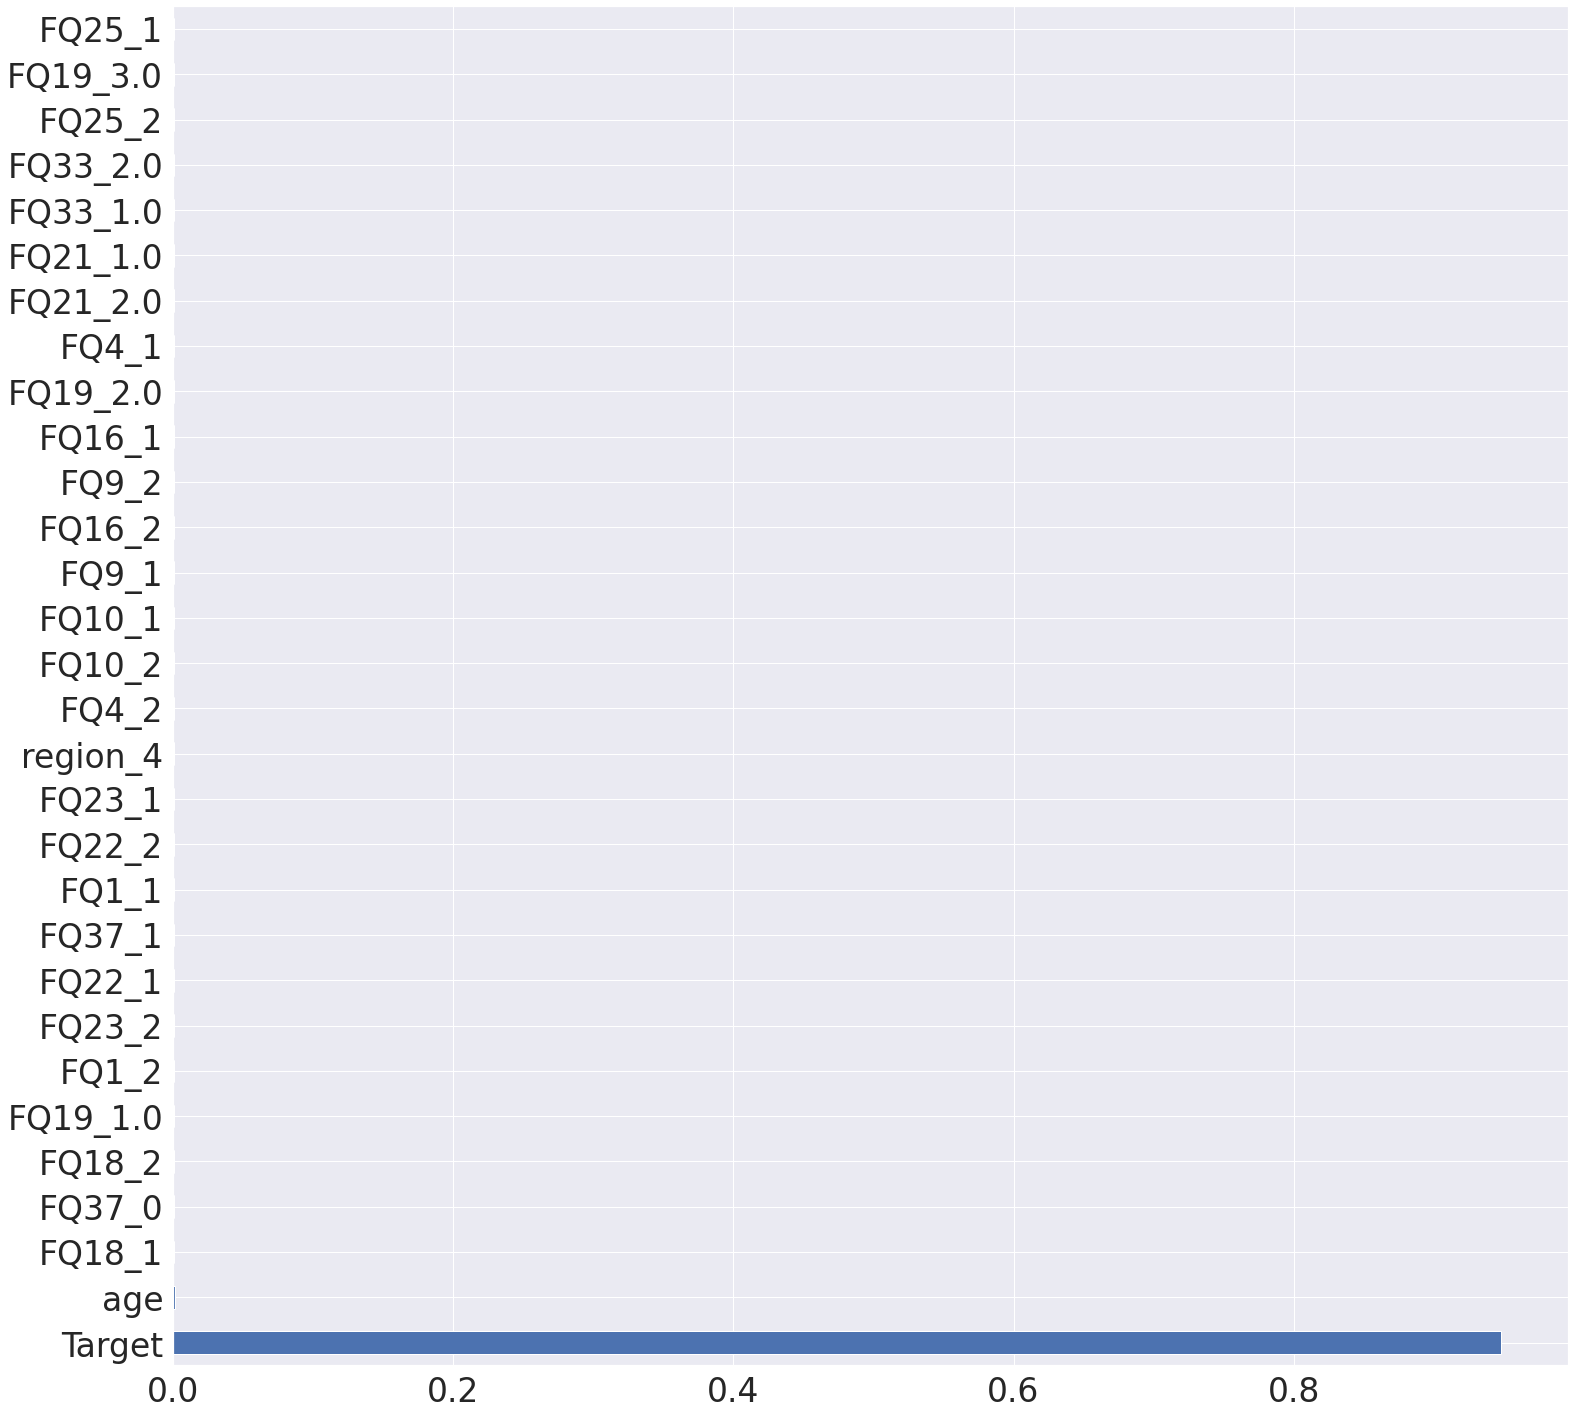

In [237]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show() 
feature_importances.to_csv('importance22.csv')

In [228]:
print(feature_importances.iloc[:165].index)

Index(['country_code_0', 'country_code_1', 'country_code_2', 'country_code_3',
       'country_code_4', 'country_code_5', 'country_code_6', 'country_code_7',
       'country_code_8', 'country_code_9',
       ...
       'FQ1_3', 'FQ1_4', 'FQ2_1.0', 'FQ2_2.0', 'FQ2_3.0', 'FQ2_4.0', 'FQ3_1.0',
       'FQ3_2.0', 'FQ3_3.0', 'FQ3_4.0'],
      dtype='object', length=165)


In [233]:
feature_importances.to_csv('importance1.csv')

In [230]:
jb.dump(model,'Onehot2.pkl')

['Onehot2.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_test,y_train,y_test=tts(features,target,train_size=0.7,stratify=target)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Finding the optimal number of features to use**

In [ ]:
#Finding the optimal number of features to use
model=RFC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
score = f1_score(y_test,y_predict)

accu = accuracy_score(y_test,y_predict)
print(f'accuracy {accu}, f1_score {score}')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()

In [ ]:
X,y = oversample.fit_resample(features,target)

### The optimal number of columns after experimentation is 165 features
###                    with f1_score of 0.23

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 57 kB/s 


### Model selection

In [ ]:
from lightgbm import LGBMClassifier as LGBM
from xgboost import XGBClassifier as XGB
from catboost import CatBoostClassifier  as Cat
from sklearn.ensemble import VotingClassifier as Voting, HistGradientBoostingClassifier as HistGrad
from sklearn.model_selection import cross_val_score  as cvs
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import numpy as np

Determining Accuracy of the models

In [ ]:
models=[LGBM(),XGB(verbose=0),Cat(verbose=0),Voting([('rf',RFC()),('LR',LR()),],verbose=0),HistGrad(verbose=0)]

for model in models:
  score = cvs(model,X[feature_importances.iloc[:165].index],y,cv=4)
  print(f'{str(model)}  with score of {np.mean(score)}')

LGBMClassifier()  with score of 0.8049937817268991
XGBClassifier(verbose=0)  with score of 0.6424536387098956
<catboost.core.CatBoostClassifier object at 0x7f29d2cb0750>  with score of 0.8085627493679739
VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('LR', LogisticRegression())],
                 verbose=0)  with score of 0.8017296382456706
HistGradientBoostingClassifier()  with score of 0.8018248916620249


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
f1_scorer = make_scorer(f1_score)

Determining f1 score for each model

In [ ]:
models=[LGBM(),XGB(verbose=0),Cat(verbose=0),Voting([('rf',RFC()),('LR',LR()),],verbose=0),HistGrad(verbose=0)]

for model in models:
  score = cvs(model,X[feature_importances.iloc[:165].index],y,scoring=f1_scorer,cv=4)
  print(f'{str(model)}  with score of {np.mean(score)}')

LGBMClassifier()  with score of 0.6573387534091778
XGBClassifier(verbose=0)  with score of 0.5099648814226696
<catboost.core.CatBoostClassifier object at 0x7f29d2c291d0>  with score of 0.6611781220649107
VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('LR', LogisticRegression())],
                 verbose=0)  with score of 0.6534200216953064
HistGradientBoostingClassifier()  with score of 0.6541195306081851


Test Voting classifier for the best models above

In [ ]:
model = Voting([('lgbm',LGBM()),('LR',Cat(verbose=0)),],verbose=0)
accuracy = cvs(model,X[feature_importances.iloc[:165].index],y,cv=4)
score = cvs(model,X[feature_importances.iloc[:165].index],y,scoring=f1_scorer,cv=4)
print(f'{str(model)}  with f1_score of {np.mean(score)} and with accuracy of{np.mean(accuracy)}')

VotingClassifier(estimators=[('lgbm', LGBMClassifier()),
                             ('LR',
                              <catboost.core.CatBoostClassifier object at 0x7f29d4089390>)],
                 verbose=0)  with f1_score of 0.6573181788643429 and with accuracy of0.8052859066679503


###  The best algorithm to use is CatBoostClassifier with an accuracy of 80.8% and f1 score of 0.66 

In [ ]:
import joblib

In [ ]:
model=Cat(verbose=0)


In [ ]:
model.fit(X[feature_importances.iloc[:165].index],y)

In [ ]:
joblib.dump(model,'mobileModel.sav')

['mobileModel.sav']

In [ ]:
model1=joblib.load('mobileModel.sav')

In [ ]:
model1

In [ ]:
!pwd

/content
